In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fraud_df = pd.read_csv('transactions.csv')
fraud_df = fraud_df.rename({'oldbalanceOrg': 'oldbalanceOrig'}, axis=1)

In [3]:
fraud_df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


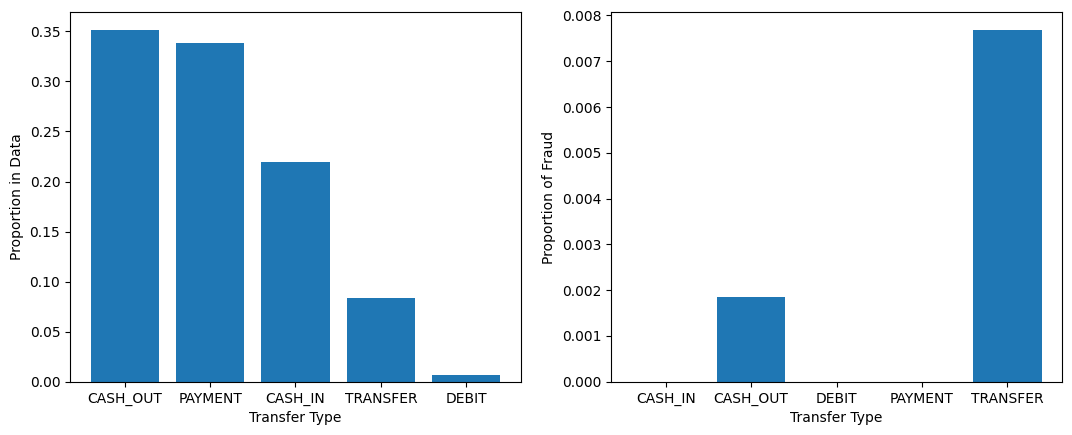

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))

type_distribution = fraud_df.type.value_counts()/len(fraud_df)
fraud_type = pd.crosstab(fraud_df.type, fraud_df.isFraud, normalize='index')[1]

ax[0].bar(type_distribution.index, type_distribution)
ax[0].set_xlabel('Transfer Type')
ax[0].set_ylabel('Proportion in Data')

ax[1].bar(fraud_type.index, fraud_type)
ax[1].set_xlabel('Transfer Type')
ax[1].set_ylabel('Proportion of Fraud')
plt.show()

In [5]:
from sklearn.preprocessing import PowerTransformer

numerical_cols = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

transformer = PowerTransformer()
transformed = transformer.fit_transform(fraud_df[numerical_cols])

transformed_cols = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_cols['isFraud'] = fraud_df.isFraud

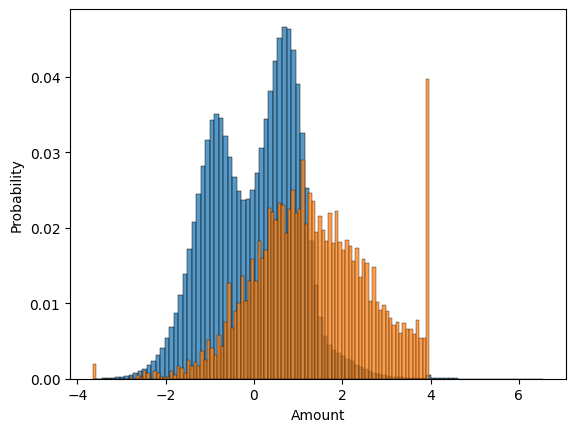

In [6]:
sns.histplot(transformed_cols[transformed_cols.isFraud == 0], x='amount', stat='probability', bins=100)
sns.histplot(transformed_cols[transformed_cols.isFraud == 1], x='amount', stat='probability', bins=100)
plt.xlabel('Amount')
plt.show()

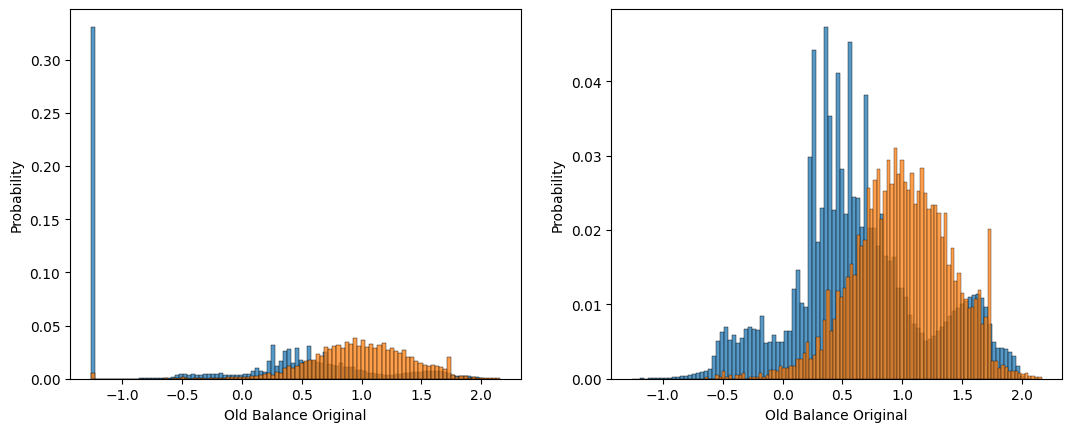

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))

sns.histplot(transformed_cols[transformed_cols.isFraud == 0], x='oldbalanceOrig', stat='probability', ax=ax[0], bins=100)
sns.histplot(transformed_cols[transformed_cols.isFraud == 1], x='oldbalanceOrig', stat='probability', ax=ax[0], bins=100)
ax[0].set_xlabel('Old Balance Original')

sns.histplot(transformed_cols[(transformed_cols.isFraud == 0) & (transformed_cols.oldbalanceOrig > -1.2665)], x='oldbalanceOrig', ax=ax[1], stat='probability', bins=100)
sns.histplot(transformed_cols[(transformed_cols.isFraud == 1) & (transformed_cols.oldbalanceOrig > -1.2665)], x='oldbalanceOrig', ax=ax[1], stat='probability', bins=100)
ax[1].set_xlabel('Old Balance Original')
plt.show()

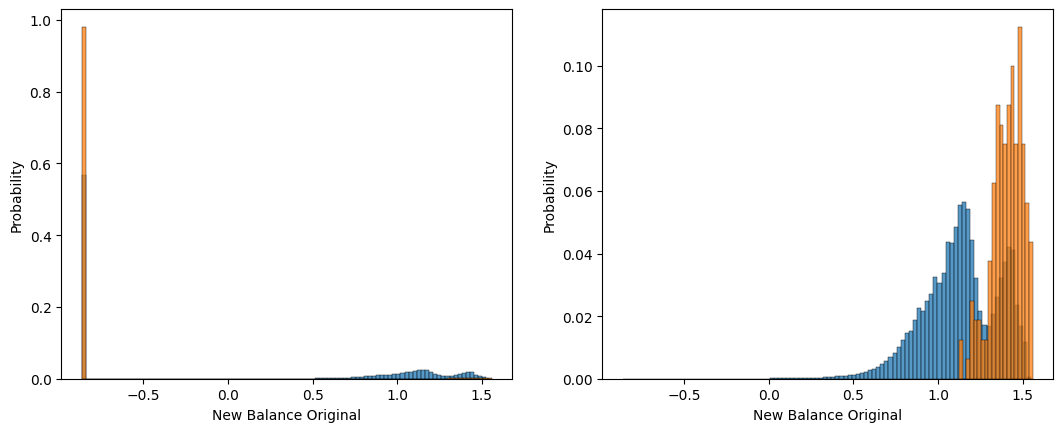

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))

sns.histplot(transformed_cols[transformed_cols.isFraud == 0], x='newbalanceOrig', stat='probability', ax=ax[0], bins=100)
sns.histplot(transformed_cols[transformed_cols.isFraud == 1], x='newbalanceOrig', stat='probability', ax=ax[0], bins=100)
ax[0].set_xlabel('New Balance Original')

sns.histplot(transformed_cols[(transformed_cols.isFraud == 0) & (transformed_cols.newbalanceOrig > -0.8638)], x='newbalanceOrig', ax=ax[1], stat='probability', bins=100)
sns.histplot(transformed_cols[(transformed_cols.isFraud == 1) & (transformed_cols.newbalanceOrig > -0.8638)], x='newbalanceOrig', ax=ax[1], stat='probability', bins=20)
ax[1].set_xlabel('New Balance Original')
plt.show()

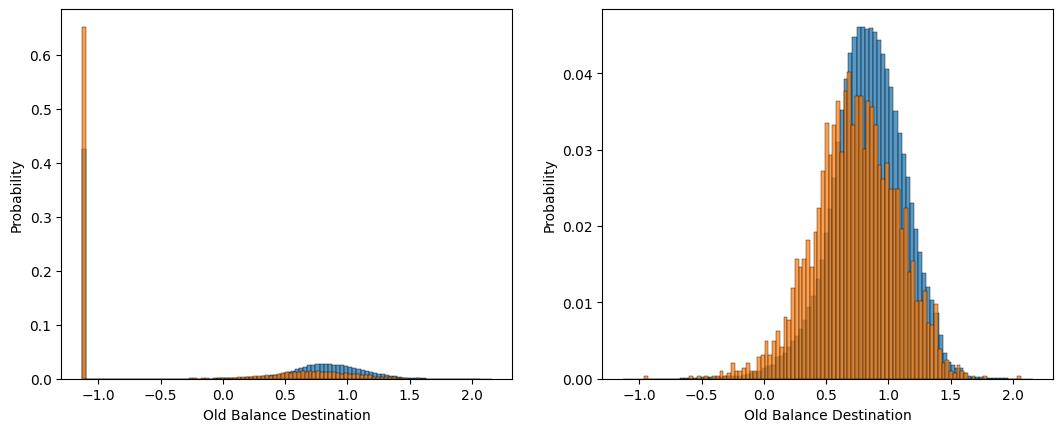

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))

sns.histplot(transformed_cols[transformed_cols.isFraud == 0], x='oldbalanceDest', stat='probability', ax=ax[0], bins=100)
sns.histplot(transformed_cols[transformed_cols.isFraud == 1], x='oldbalanceDest', stat='probability', ax=ax[0], bins=100)
ax[0].set_xlabel('Old Balance Destination')

sns.histplot(transformed_cols[(transformed_cols.isFraud == 0) & (transformed_cols.oldbalanceDest > -1.134)], x='oldbalanceDest', ax=ax[1], stat='probability', bins=100)
sns.histplot(transformed_cols[(transformed_cols.isFraud == 1) & (transformed_cols.oldbalanceDest > -1.134)], x='oldbalanceDest', ax=ax[1], stat='probability', bins=100)
ax[1].set_xlabel('Old Balance Destination')
plt.show()

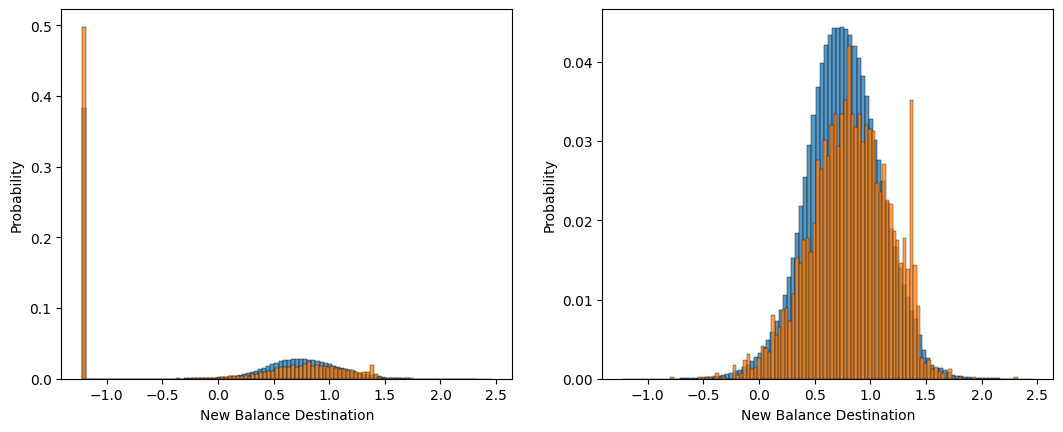

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))

sns.histplot(transformed_cols[transformed_cols.isFraud == 0], x='newbalanceDest', stat='probability', ax=ax[0], bins=100)
sns.histplot(transformed_cols[transformed_cols.isFraud == 1], x='newbalanceDest', stat='probability', ax=ax[0], bins=100)
ax[0].set_xlabel('New Balance Destination')

sns.histplot(transformed_cols[(transformed_cols.isFraud == 0) & (transformed_cols.newbalanceDest > -1.2241)], x='newbalanceDest', ax=ax[1], stat='probability', bins=100)
sns.histplot(transformed_cols[(transformed_cols.isFraud == 1) & (transformed_cols.newbalanceDest > -1.2241)], x='newbalanceDest', ax=ax[1], stat='probability', bins=100)
ax[1].set_xlabel('New Balance Destination')
plt.show()

In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, dtype='int64')
encoded = encoder.fit_transform(fraud_df[['type']])
one_hot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

fraud_df = pd.concat([fraud_df, one_hot_df], axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

scaler = StandardScaler()
scaled = scaler.fit_transform(fraud_df[numerical_cols])

scaled_cols = pd.DataFrame(scaled, columns=scaler.get_feature_names_out())

fraud_df[numerical_cols] = scaled_cols

In [29]:
X = fraud_df[['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_OUT', 'type_TRANSFER']]
y = fraud_df.isFraud

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:,1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.76      0.85      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.88      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



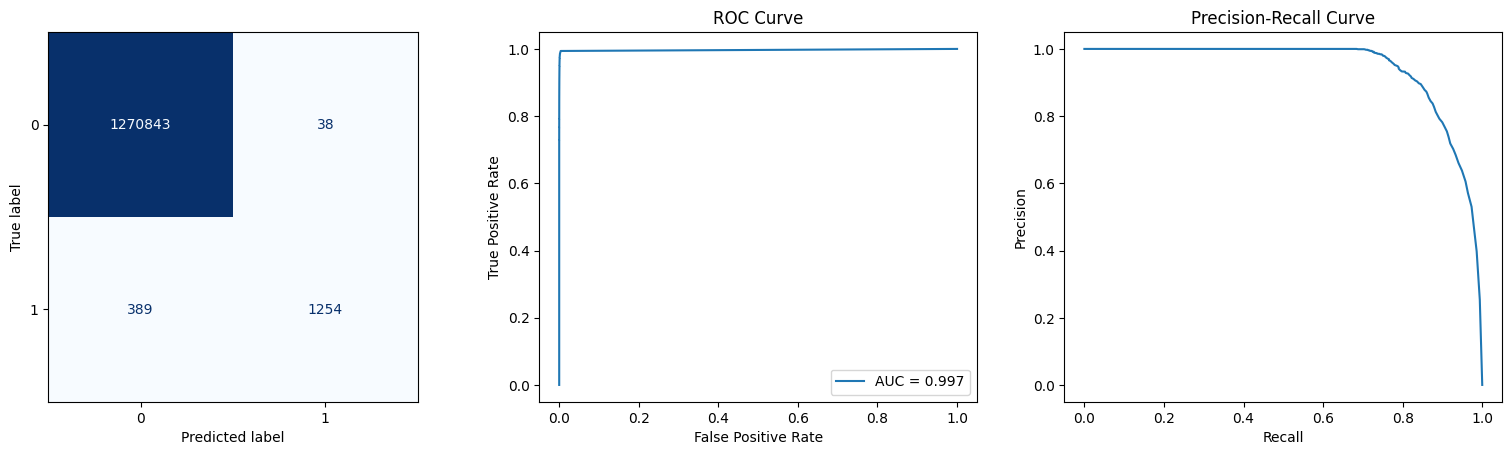

In [61]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

fig, ax = plt.subplots(1, 3, figsize=(19.2, 4.8))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
display = metrics.ConfusionMatrixDisplay(confusion_matrix)
display.plot(cmap='Blues', ax=ax[0], values_format='d', colorbar=False)

fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
auc = metrics.roc_auc_score(y_test, y_proba)
ax[1].plot(fpr, tpr, label = f'AUC = {auc:.3f}')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')
ax[1].legend(loc='lower right')

precision, recall, _ = metrics.precision_recall_curve(y_test, y_proba)
ax[2].plot(recall, precision)
ax[2].set_xlabel('Recall')
ax[2].set_ylabel('Precision')
ax[2].set_title('Precision-Recall Curve')

plt.show()

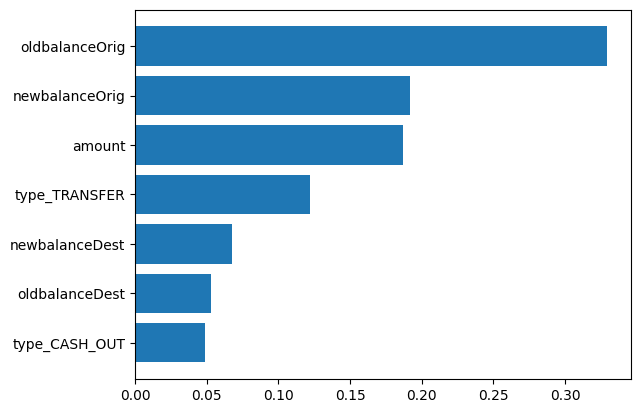

In [37]:
feature_importance = pd.Series(data=rf_model.feature_importances_, index=rf_model.feature_names_in_).sort_values()
plt.barh(y=feature_importance.index, width=feature_importance)
plt.show()